Import the necessary libraries

In [127]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

import datetime
from datetime import date

In [128]:
#import the covid data set that we want to use
df = pd.read_csv(r'venv/covid_19_indonesia_time_series_all 2.csv')

df.head(5)

Date Location ISO Code     Location  New Cases  New Deaths  \
0  3/1/2020             ID-JK  DKI Jakarta          2           0   
1  3/2/2020             ID-JK  DKI Jakarta          2           0   
2  3/2/2020               IDN    Indonesia          2           0   
3  3/2/2020             ID-RI         Riau          1           0   
4  3/3/2020             ID-JK  DKI Jakarta          2           0   

   New Recovered  New Active Cases  Total Cases  Total Deaths  \
0              0                 2           39            20   
1              0                 2           41            20   
2              0                 2            2             0   
3              0                 1            2             0   
4              0                 2           43            20   

   Total Recovered  ...  Latitude New Cases per Million  \
0               41  ... -6.204699                  0.18   
1               41  ... -6.204699                  0.18   
2                0  ... -0.789275                  0.01   
3                3  ...  0.511648                  0.16   
4               41  ... -6.204699                  0.18   

   Total Cases per Million New Deaths per Million Total Deaths per Million  \
0                     3.60                    0.0                     1.84   
1                     3.78                    0.0                     1.84   
2                     0.01                    0.0                     0.00   
3                     0.33                    0.0                     0.00   
4                     3.96                    0.0                     1.84   

  Total Deaths per 100rb Case Fatality Rate Case Recovered Rate  \
0                   0.18             51.28%             105.13%   
1                   0.18             48.78%             100.00%   
2                   0.00              0.00%               0.00%   
3                   0.00              0.00%             150.00%   
4                   0.18             46.51%              95.35%   

  Growth Factor of New Cases  Growth Factor of New Deaths  
0                        NaN                          NaN  
1                        1.0                          1.0  
2                        NaN                          NaN  
3                        NaN                          NaN  
4                        1.0                          1.0  

[5 rows x 38 columns]

In [129]:
#getting 10% of the data since the data we are using it too big
# generating random sample from the dataframe
#new_df = df.sample(frac =.10)

# checking if sample is 0.10 times data or not

#if (0.10*(len(df))== len(new_df)):
#    print( "Correct")
#    print(len(df), len(new_df))

# display
#new_df.head(20)


In [130]:
#changing the format of the date
date2=[]
for item in df['Date']:
    item2=item.split('/')
    month=int(item2[0])
    day=int(item2[1])
    year=int(item2[2])
    date2+=[datetime.date(year,month,day)]
df['Date']=date2
df['Date'] = pd.to_datetime(df['Date'])

df

Date Location ISO Code          Location  New Cases  New Deaths  \
0     2020-03-01             ID-JK       DKI Jakarta          2           0   
1     2020-03-02             ID-JK       DKI Jakarta          2           0   
2     2020-03-02               IDN         Indonesia          2           0   
3     2020-03-02             ID-RI              Riau          1           0   
4     2020-03-03             ID-JK       DKI Jakarta          2           0   
...          ...               ...               ...        ...         ...   
21754 2021-12-02             ID-SA    Sulawesi Utara          2           0   
21755 2021-12-02             ID-SB    Sumatera Barat          4           0   
21756 2021-12-02             ID-SS  Sumatera Selatan          4           0   
21757 2021-12-02             ID-SU    Sumatera Utara          4           0   
21758 2021-12-03               IDN         Indonesia        245           8   

       New Recovered  New Active Cases  Total Cases  Total Deaths  \
0                  0                 2           39            20   
1                  0                 2           41            20   
2                  0                 2            2             0   
3                  0                 1            2             0   
4                  0                 2           43            20   
...              ...               ...          ...           ...   
21754              0                 2        34715          1056   
21755              0                 4        89849          2152   
21756              0                 4        59937          3071   
21757              1                 3       106045          2889   
21758            328               -91      4257243        143858   

       Total Recovered  ...  Latitude New Cases per Million  \
0                   41  ... -6.204699                  0.18   
1                   41  ... -6.204699                  0.18   
2                    0  ... -0.789275                  0.01   
3                    3  ...  0.511648                  0.16   
4                   41  ... -6.204699                  0.18   
...                ...  ...       ...                   ...   
21754            33566  ...  1.259638                  0.76   
21755            87605  ... -0.850253                  0.72   
21756            56830  ... -3.216212                  0.49   
21757           103061  ...  2.191894                  0.27   
21758          4105680  ... -0.789275                  0.92   

       Total Cases per Million New Deaths per Million  \
0                         3.60                   0.00   
1                         3.78                   0.00   
2                         0.01                   0.00   
3                         0.33                   0.00   
4                         3.96                   0.00   
...                        ...                    ...   
21754                 13140.24                   0.00   
21755                 16279.22                   0.00   
21756                  7293.78                   0.00   
21757                  7129.13                   0.00   
21758                 16053.83                   0.03   

      Total Deaths per Million Total Deaths per 100rb Case Fatality Rate  \
0                         1.84                   0.18             51.28%   
1                         1.84                   0.18             48.78%   
2                         0.00                   0.00              0.00%   
3                         0.00                   0.00              0.00%   
4                         1.84                   0.18             46.51%   
...                        ...                    ...                ...   
21754                   399.71                  39.97              3.04%   
21755                   389.91                  38.99              2.40%   
21756                   373.71                  37.37              5.12%   
21757                   194.22  

In [131]:
#checking the info and description of the data
print('------INFO-----')

df.info()

------INFO-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         21759 non-null  datetime64[ns]
 1   Location ISO Code            21759 non-null  object        
 2   Location                     21759 non-null  object        
 3   New Cases                    21759 non-null  int64         
 4   New Deaths                   21759 non-null  int64         
 5   New Recovered                21759 non-null  int64         
 6   New Active Cases             21759 non-null  int64         
 7   Total Cases                  21759 non-null  int64         
 8   Total Deaths                 21759 non-null  int64         
 9   Total Recovered              21759 non-null  int64         
 10  Total Active Cases           21759 non-null  int64         
 11  Location Level           

In [132]:
df.describe()

New Cases    New Deaths  New Recovered  New Active Cases  \
count  21759.000000  21759.000000   21759.000000      21759.000000   
mean     391.293580     13.220415     377.310998          0.762167   
std     2074.551043     76.482617    1999.062563        937.213509   
min        0.000000      0.000000       0.000000     -25725.000000   
25%        7.000000      0.000000       4.000000        -16.000000   
50%       41.000000      1.000000      31.000000          0.000000   
75%      151.000000      5.000000     143.000000         27.000000   
max    56757.000000   2069.000000   48832.000000      36726.000000   

        Total Cases   Total Deaths  Total Recovered  Total Active Cases  \
count  2.175900e+04   21759.000000     2.175900e+04        21759.000000   
mean   8.525997e+04    2648.289352     7.671260e+04         5899.079002   
std    3.685133e+05   11776.011067     3.403957e+05        27518.102431   
min    1.000000e+00       0.000000     0.000000e+00        -2306.000000   
25%    1.822500e+03      50.000000     1.038500e+03          182.000000   
50%    1.078000e+04     283.000000     8.745000e+03          919.000000   
75%    3.646450e+04    1050.000000     3.293250e+04         2607.500000   
max    4.257243e+06  143858.000000     4.105680e+06       574135.000000   

       City or Regency  Total Regencies  ...  Population Density  \
count              0.0     21759.000000  ...        21759.000000   
mean               NaN        24.160256  ...          744.989784   
std                NaN        68.708265  ...         2743.209719   
min                NaN         1.000000  ...            8.590000   
25%                NaN         7.000000  ...           47.790000   
50%                NaN        11.000000  ...          103.840000   
75%                NaN        18.000000  ...          262.700000   
max                NaN       416.000000  ...        16334.310000   

          Longitude      Latitude  New Cases per Million  \
count  21759.000000  21759.000000           21759.000000   
mean     113.680803     -2.731868              29.393033   
std        9.857587      3.608264              69.941090   
min       96.910522     -8.682205               0.000000   
25%      106.109004     -6.204699               1.750000   
50%      113.417654     -2.461746               8.160000   
75%      121.201093      0.212037              26.260000   
max      138.696030      4.225615            1348.130000   

       Total Cases per Million  New Deaths per Million  \
count             21759.000000            21759.000000   
mean               6183.650588                0.852727   
std               10288.123342                2.277310   
min                   0.010000                0.000000   
25%                 415.915000                0.000000   
50%                2727.460000                0.180000   
75%                7374.120000                0.750000   
max               79663.790000               63.800000   

       Total Deaths per Million  Total Deaths per 100rb  \
count              21759.000000            21759.000000   
mean                 163.542156               16.354192   
std                  254.195761               25.419595   
min                    0.000000                0.000000   
25%                   10.880000                1.090000   
50%                   73.550000                7.350000   
75%                  195.850000               19.585000   
max                 1533.980000              153.400000   

       Growth Factor of New Cases  Growth Factor of New Deaths  
count                20572.000000                 19292.000000  
mean                     1.395671                     1.074145  
std                      3.080207                     1.578502  
min                      0.000000                     0.000000  
25%                      0.650000                     0.660000  
50%                      0.990000                     1.000000  
75%                      1.330000      

In [133]:
missing_new_df = df[df.isna().any(axis=1)]
missing_new_df.head(100)
#print(len(missing_new_df))

Date Location ISO Code           Location  New Cases  New Deaths  \
0  2020-03-01             ID-JK        DKI Jakarta          2           0   
1  2020-03-02             ID-JK        DKI Jakarta          2           0   
2  2020-03-02               IDN          Indonesia          2           0   
3  2020-03-02             ID-RI               Riau          1           0   
4  2020-03-03             ID-JK        DKI Jakarta          2           0   
..        ...               ...                ...        ...         ...   
95 2020-03-16             ID-RI               Riau          0           0   
96 2020-03-16             ID-SG  Sulawesi Tenggara          2           0   
97 2020-03-17             ID-BA               Bali          0           0   
98 2020-03-17             ID-BT             Banten          0           1   
99 2020-03-17             ID-JK        DKI Jakarta          2           1   

    New Recovered  New Active Cases  Total Cases  Total Deaths  \
0               0                 2           39            20   
1               0                 2           41            20   
2               0                 2            2             0   
3               0                 1            2             0   
4               0                 2           43            20   
..            ...               ...          ...           ...   
95              0                 0            2             0   
96              0                 2            3             0   
97              0                 0            1             1   
98              3                -4            6             8   
99              0                 1           65            34   

    Total Recovered  ...  Latitude New Cases per Million  \
0                41  ... -6.204699                  0.18   
1                41  ... -6.204699                  0.18   
2                 0  ... -0.789275                  0.01   
3                 3  ...  0.511648                  0.16   
4                41  ... -6.204699                  0.18   
..              ...  ...       ...                   ...   
95                3  ...  0.511648                  0.00   
96                0  ... -4.124689                  0.76   
97                3  ... -8.369472                  0.00   
98              109  ... -6.456736                  0.00   
99               49  ... -6.204699                  0.18   

    Total Cases per Million New Deaths per Million Total Deaths per Million  \
0                      3.60                   0.00                     1.84   
1                      3.78                   0.00                     1.84   
2                      0.01                   0.00                     0.00   
3                      0.33                   0.00                     0.00   
4                      3.96                   0.00                     1.84   
..                      ...                    ...                      ...   
95                     0.33                   0.00                     0.00   
96                     1.14                   0.00                     0.00   
97                     0.24                   0.00                     0.24   
98                     0.56                   0.09                     0.75   
99                     5.99                   0.09                     3.13   

   Total Deaths per 100rb Case Fatality Rate Case Recovered Rate  \
0                    0.18             51.28%             105.13%   
1                    0.18             48.78%             100.00%   
2                    0.00              0.00%               0.00%   
3                    0.00              0.00%             150.00%   
4                    0.18             46.51%              95.35%   
..                    ...                ...                 ...   
95                   0.00              0.00%             150.00%   
96                   0.00              0.00%               0.00%   
97       

Data Cleaning

In [134]:
#removing the column with all null values and the column that is not needed and replacing missing values with 0
new_data = df.drop(['City or Regency','Location ISO Code',
                'Province','Country','Continent','Island','Time Zone','Special Status',
                'Total Regencies','Total Cities','Total Districts','Total Urban Villages',
                'Total Rural Villages','New Cases per Million','Total Cases per Million',
                'New Deaths per Million','Total Deaths per Million','Case Fatality Rate',
                'Case Recovered Rate','Growth Factor of New Cases','Growth Factor of New Deaths'],axis = 1)
new_data = new_data.fillna(0)
new_data.head()


Date     Location  New Cases  New Deaths  New Recovered  \
0 2020-03-01  DKI Jakarta          2           0              0   
1 2020-03-02  DKI Jakarta          2           0              0   
2 2020-03-02    Indonesia          2           0              0   
3 2020-03-02         Riau          1           0              0   
4 2020-03-03  DKI Jakarta          2           0              0   

   New Active Cases  Total Cases  Total Deaths  Total Recovered  \
0                 2           39            20               41   
1                 2           41            20               41   
2                 2            2             0                0   
3                 1            2             0                3   
4                 2           43            20               41   

   Total Active Cases Location Level  Area (km2)  Population  \
0                 -22       Province         664    10846145   
1                 -20       Province         664    10846145   
2                   2        Country     1916907   265185520   
3                  -1       Province       87024     6074100   
4                 -18       Province         664    10846145   

   Population Density   Longitude  Latitude  Total Deaths per 100rb  
0            16334.31  106.836118 -6.204699                    0.18  
1            16334.31  106.836118 -6.204699                    0.18  
2              138.34  113.921327 -0.789275                    0.00  
3               69.80  101.805109  0.511648                    0.00  
4            16334.31  106.836118 -6.204699                    0.18

In [135]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    21759 non-null  datetime64[ns]
 1   Location                21759 non-null  object        
 2   New Cases               21759 non-null  int64         
 3   New Deaths              21759 non-null  int64         
 4   New Recovered           21759 non-null  int64         
 5   New Active Cases        21759 non-null  int64         
 6   Total Cases             21759 non-null  int64         
 7   Total Deaths            21759 non-null  int64         
 8   Total Recovered         21759 non-null  int64         
 9   Total Active Cases      21759 non-null  int64         
 10  Location Level          21759 non-null  object        
 11  Area (km2)              21759 non-null  int64         
 12  Population              21759 non-null  int64 

In [136]:
data1 = new_data[new_data['Location Level'] != 'Country']
data1.head()

Date     Location  New Cases  New Deaths  New Recovered  \
0 2020-03-01  DKI Jakarta          2           0              0   
1 2020-03-02  DKI Jakarta          2           0              0   
3 2020-03-02         Riau          1           0              0   
4 2020-03-03  DKI Jakarta          2           0              0   
6 2020-03-03   Jawa Barat          1           1              0   

   New Active Cases  Total Cases  Total Deaths  Total Recovered  \
0                 2           39            20               41   
1                 2           41            20               41   
3                 1            2             0                3   
4                 2           43            20               41   
6                 0            1             1                8   

   Total Active Cases Location Level  Area (km2)  Population  \
0                 -22       Province         664    10846145   
1                 -20       Province         664    10846145   
3                  -1       Province       87024     6074100   
4                 -18       Province         664    10846145   
6                  -8       Province       35378    45161325   

   Population Density   Longitude  Latitude  Total Deaths per 100rb  
0            16334.31  106.836118 -6.204699                    0.18  
1            16334.31  106.836118 -6.204699                    0.18  
3               69.80  101.805109  0.511648                    0.00  
4            16334.31  106.836118 -6.204699                    0.18  
6             1276.55  107.603708 -6.920432                    0.00

In [137]:
#dropping duplicates of the location
new_data1 = data1.drop_duplicates(subset='Location', keep="last")
new_data1.head(34)

Date                    Location  New Cases  New Deaths  \
21364 2021-11-21                   Gorontalo          1           0   
21617 2021-11-28                Maluku Utara          2           0   
21700 2021-12-01                    Bengkulu          1           0   
21712 2021-12-01            Kalimantan Utara          1           0   
21714 2021-12-01              Kepulauan Riau          2           0   
21716 2021-12-01                      Maluku          1           0   
21722 2021-12-01              Sulawesi Barat          1           0   
21730 2021-12-02                        Aceh          2           0   
21731 2021-12-02                        Bali         15           1   
21732 2021-12-02                      Banten         16           0   
21733 2021-12-02                 DKI Jakarta         28           0   
21734 2021-12-02  Daerah Istimewa Yogyakarta          7           0   
21736 2021-12-02                       Jambi          1           0   
21737 2021-12-02                  Jawa Barat         83           0   
21738 2021-12-02                 Jawa Tengah         30           1   
21739 2021-12-02                  Jawa Timur         35           0   
21740 2021-12-02            Kalimantan Barat          5           0   
21741 2021-12-02          Kalimantan Selatan          2           0   
21742 2021-12-02           Kalimantan Tengah          4           0   
21743 2021-12-02            Kalimantan Timur          7           0   
21744 2021-12-02   Kepulauan Bangka Belitung          8           0   
21745 2021-12-02                     Lampung          2           0   
21746 2021-12-02         Nusa Tenggara Barat          1           0   
21747 2021-12-02         Nusa Tenggara Timur          9           0   
21748 2021-12-02                       Papua          2           0   
21749 2021-12-02                 Papua Barat          9           0   
21750 2021-12-02                        Riau          4           0   
21751 2021-12-02            Sulawesi Selatan          1           1   
21752 2021-12-02             Sulawesi Tengah         11           0   
21753 2021-12-02           Sulawesi Tenggara          3           0   
21754 2021-12-02              Sulawesi Utara          2           0   
21755 2021-12-02              Sumatera Barat          4           0   
21756 2021-12-02            Sumatera Selatan          4           0   
21757 2021-12-02              Sumatera Utara          4           0   

       New Recovered  New Active Cases  Total Cases  Total Deaths  \
21364              0                 1        11834           460   
21617              3                -1        12101           303   
21700              0                 1        23104           473   
21712              0                 1        35885           811   
21714              0                 2        53884          1748   
21716              0                 1        14587           261   
21722              0                 1        12353           346   
21730              0                 2        38416          2066   
21731              1                13       114233          4046   
21732              1                15       132693          2688   
21733              0                28       864045         13596   
21734              0                 7       156769          5263   
21736              0                 1        29768           789   
21737              6                77       707934         14737   
21738              6                23       486435         30225   
21739             11                24       399478         29697   
21740              6                -1        41536          1061   
21741              0                 2        69927          2390   
21742              1                 3        45622          1430   
21743              2                 5       158245          5449   
21744              0                 8        52290          1455   
21745   

In [138]:
new_data1.shape

(34, 17)

FILTERING

In [139]:
#filtering out the rows and sorting them in descending order
#This code filters out the rows with 'Indonesia' as the 'Location' and then sorts the remaining rows in descending order based on the 'Total Cases' column. The resulting data is then returned.

new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)

Date                    Location  New Cases  New Deaths  \
21733 2021-12-02                 DKI Jakarta         28           0   
21737 2021-12-02                  Jawa Barat         83           0   
21738 2021-12-02                 Jawa Tengah         30           1   
21739 2021-12-02                  Jawa Timur         35           0   
21743 2021-12-02            Kalimantan Timur          7           0   
21734 2021-12-02  Daerah Istimewa Yogyakarta          7           0   
21732 2021-12-02                      Banten         16           0   
21750 2021-12-02                        Riau          4           0   
21731 2021-12-02                        Bali         15           1   
21751 2021-12-02            Sulawesi Selatan          1           1   
21757 2021-12-02              Sumatera Utara          4           0   
21755 2021-12-02              Sumatera Barat          4           0   
21741 2021-12-02          Kalimantan Selatan          2           0   
21747 2021-12-02         Nusa Tenggara Timur          9           0   
21756 2021-12-02            Sumatera Selatan          4           0   
21714 2021-12-01              Kepulauan Riau          2           0   
21744 2021-12-02   Kepulauan Bangka Belitung          8           0   
21745 2021-12-02                     Lampung          2           0   
21752 2021-12-02             Sulawesi Tengah         11           0   
21742 2021-12-02           Kalimantan Tengah          4           0   
21740 2021-12-02            Kalimantan Barat          5           0   
21730 2021-12-02                        Aceh          2           0   
21712 2021-12-01            Kalimantan Utara          1           0   
21754 2021-12-02              Sulawesi Utara          2           0   
21748 2021-12-02                       Papua          2           0   
21736 2021-12-02                       Jambi          1           0   
21746 2021-12-02         Nusa Tenggara Barat          1           0   
21749 2021-12-02                 Papua Barat          9           0   
21700 2021-12-01                    Bengkulu          1           0   
21753 2021-12-02           Sulawesi Tenggara          3           0   
21716 2021-12-01                      Maluku          1           0   
21722 2021-12-01              Sulawesi Barat          1           0   
21617 2021-11-28                Maluku Utara          2           0   
21364 2021-11-21                   Gorontalo          1           0   

       New Recovered  New Active Cases  Total Cases  Total Deaths  \
21733              0                28       864045         13596   
21737              6                77       707934         14737   
21738              6                23       486435         30225   
21739             11                24       399478         29697   
21743              2                 5       158245          5449   
21734              0                 7       156769          5263   
21732              1                15       132693          2688   
21750              0                 4       128825          4109   
21731              1                13       114233          4046   
21751              1                -1       109919          2238   
21757              1                 3       106045          2889   
21755              0                 4        89849          2152   
21741              0                 2        69927          2390   
21747              0                 9        64035          1340   
21756              0                 4        59937          3071   
21714              0                 2        53884          1748   
21744              0                 8        52290          1455   
21745              0                 2        49691          3866   
21752              2                 9        47153          1602   
21742              1                 3        45622          1430   
21740              6                -1        41536          1061   
21730   

VISUALIZING THE DATA

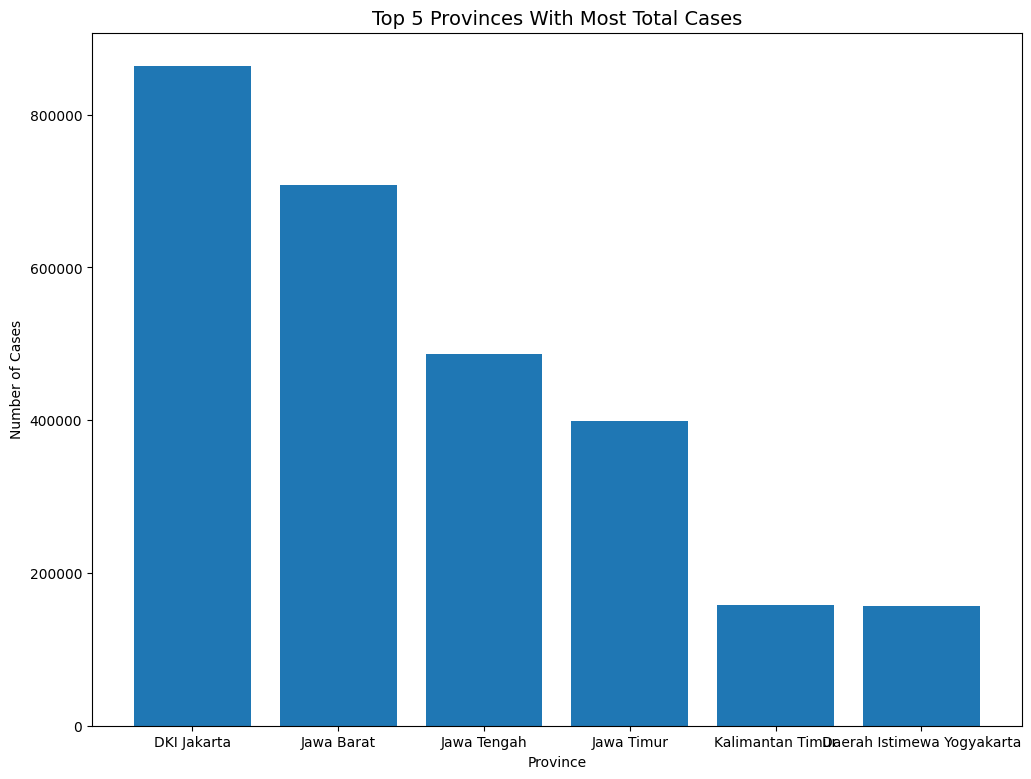

In [140]:
#plotting a bar plot of provinces with the most total cases
plt.figure(figsize=(12,9))
plt.bar(new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Location'].values[:6], new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Total Cases'].values[:6])
plt.title('Top 5 Provinces With Most Total Cases', fontsize=14)
plt.xlabel('Province')
plt.ylabel('Number of Cases')
plt.show()

In [141]:
new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)

Date                    Location  New Cases  New Deaths  \
21738 2021-12-02                 Jawa Tengah         30           1   
21739 2021-12-02                  Jawa Timur         35           0   
21737 2021-12-02                  Jawa Barat         83           0   
21733 2021-12-02                 DKI Jakarta         28           0   
21743 2021-12-02            Kalimantan Timur          7           0   
21734 2021-12-02  Daerah Istimewa Yogyakarta          7           0   
21750 2021-12-02                        Riau          4           0   
21731 2021-12-02                        Bali         15           1   
21745 2021-12-02                     Lampung          2           0   
21756 2021-12-02            Sumatera Selatan          4           0   
21757 2021-12-02              Sumatera Utara          4           0   
21732 2021-12-02                      Banten         16           0   
21741 2021-12-02          Kalimantan Selatan          2           0   
21751 2021-12-02            Sulawesi Selatan          1           1   
21755 2021-12-02              Sumatera Barat          4           0   
21730 2021-12-02                        Aceh          2           0   
21714 2021-12-01              Kepulauan Riau          2           0   
21752 2021-12-02             Sulawesi Tengah         11           0   
21744 2021-12-02   Kepulauan Bangka Belitung          8           0   
21742 2021-12-02           Kalimantan Tengah          4           0   
21747 2021-12-02         Nusa Tenggara Timur          9           0   
21740 2021-12-02            Kalimantan Barat          5           0   
21754 2021-12-02              Sulawesi Utara          2           0   
21746 2021-12-02         Nusa Tenggara Barat          1           0   
21712 2021-12-01            Kalimantan Utara          1           0   
21736 2021-12-02                       Jambi          1           0   
21748 2021-12-02                       Papua          2           0   
21753 2021-12-02           Sulawesi Tenggara          3           0   
21700 2021-12-01                    Bengkulu          1           0   
21364 2021-11-21                   Gorontalo          1           0   
21749 2021-12-02                 Papua Barat          9           0   
21722 2021-12-01              Sulawesi Barat          1           0   
21617 2021-11-28                Maluku Utara          2           0   
21716 2021-12-01                      Maluku          1           0   

       New Recovered  New Active Cases  Total Cases  Total Deaths  \
21738              6                23       486435         30225   
21739             11                24       399478         29697   
21737              6                77       707934         14737   
21733              0                28       864045         13596   
21743              2                 5       158245          5449   
21734              0                 7       156769          5263   
21750              0                 4       128825          4109   
21731              1                13       114233          4046   
21745              0                 2        49691          3866   
21756              0                 4        59937          3071   
21757              1                 3       106045          2889   
21732              1                15       132693          2688   
21741              0                 2        69927          2390   
21751              1                -1       109919          2238   
21755              0                 4        89849          2152   
21730              0                 2        38416          2066   
21714              0                 2        53884          1748   
21752              2                 9        47153          1602   
21744              0                 8        52290          1455   
21742              1                 3        45622          1430   
21747              0                 9        64035          1340   
21740   

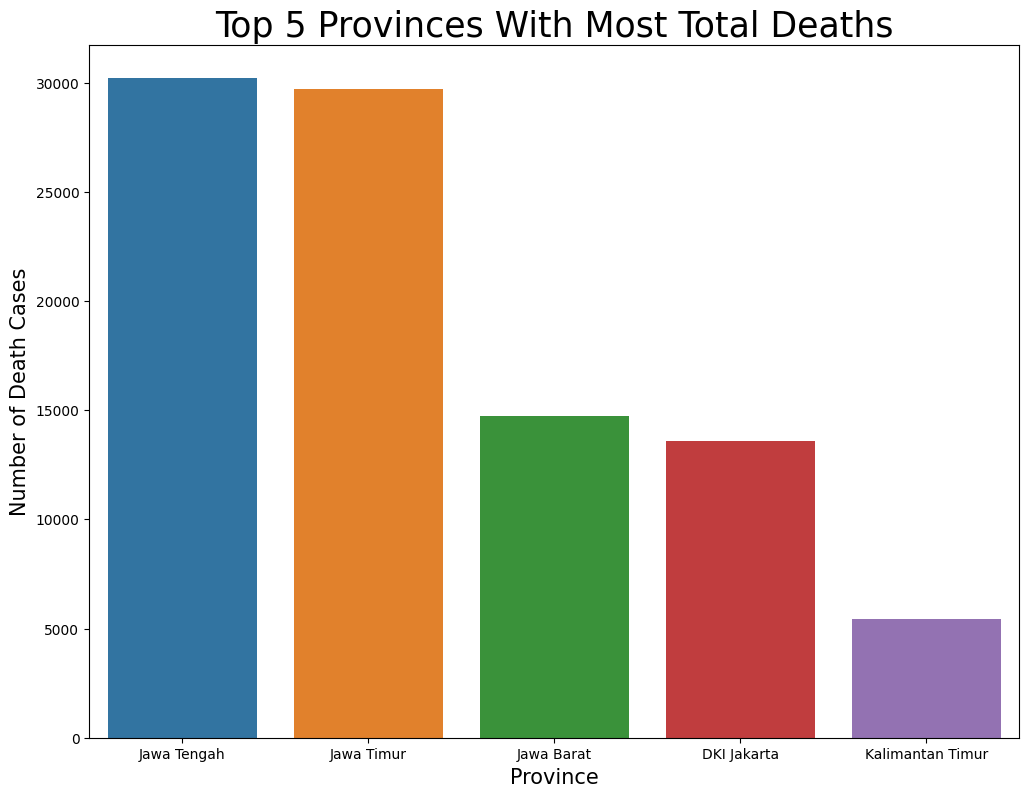

In [142]:
# plotting a bar plot of provinces with the most total deaths using seaborn
import seaborn as sns
plt.figure(figsize=(12,9))
sns.barplot(x=new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)['Location'].values[:5], y=new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)['Total Deaths'].values[:5])
plt.title('Top 5 Provinces With Most Total Deaths', fontsize=25)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Number of Death Cases', fontsize=15)
plt.show()

In [143]:
#sorting the data from descending order of total recoveries
new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False)

Date                    Location  New Cases  New Deaths  \
21733 2021-12-02                 DKI Jakarta         28           0   
21737 2021-12-02                  Jawa Barat         83           0   
21738 2021-12-02                 Jawa Tengah         30           1   
21739 2021-12-02                  Jawa Timur         35           0   
21743 2021-12-02            Kalimantan Timur          7           0   
21734 2021-12-02  Daerah Istimewa Yogyakarta          7           0   
21732 2021-12-02                      Banten         16           0   
21750 2021-12-02                        Riau          4           0   
21731 2021-12-02                        Bali         15           1   
21751 2021-12-02            Sulawesi Selatan          1           1   
21757 2021-12-02              Sumatera Utara          4           0   
21755 2021-12-02              Sumatera Barat          4           0   
21741 2021-12-02          Kalimantan Selatan          2           0   
21747 2021-12-02         Nusa Tenggara Timur          9           0   
21756 2021-12-02            Sumatera Selatan          4           0   
21714 2021-12-01              Kepulauan Riau          2           0   
21744 2021-12-02   Kepulauan Bangka Belitung          8           0   
21752 2021-12-02             Sulawesi Tengah         11           0   
21745 2021-12-02                     Lampung          2           0   
21742 2021-12-02           Kalimantan Tengah          4           0   
21740 2021-12-02            Kalimantan Barat          5           0   
21730 2021-12-02                        Aceh          2           0   
21712 2021-12-01            Kalimantan Utara          1           0   
21754 2021-12-02              Sulawesi Utara          2           0   
21748 2021-12-02                       Papua          2           0   
21736 2021-12-02                       Jambi          1           0   
21746 2021-12-02         Nusa Tenggara Barat          1           0   
21749 2021-12-02                 Papua Barat          9           0   
21700 2021-12-01                    Bengkulu          1           0   
21753 2021-12-02           Sulawesi Tenggara          3           0   
21716 2021-12-01                      Maluku          1           0   
21722 2021-12-01              Sulawesi Barat          1           0   
21617 2021-11-28                Maluku Utara          2           0   
21364 2021-11-21                   Gorontalo          1           0   

       New Recovered  New Active Cases  Total Cases  Total Deaths  \
21733              0                28       864045         13596   
21737              6                77       707934         14737   
21738              6                23       486435         30225   
21739             11                24       399478         29697   
21743              2                 5       158245          5449   
21734              0                 7       156769          5263   
21732              1                15       132693          2688   
21750              0                 4       128825          4109   
21731              1                13       114233          4046   
21751              1                -1       109919          2238   
21757              1                 3       106045          2889   
21755              0                 4        89849          2152   
21741              0                 2        69927          2390   
21747              0                 9        64035          1340   
21756              0                 4        59937          3071   
21714              0                 2        53884          1748   
21744              0                 8        52290          1455   
21752              2                 9        47153          1602   
21745              0                 2        49691          3866   
21742              1                 3        45622          1430   
21740              6                -1        41536          1061   
21730   

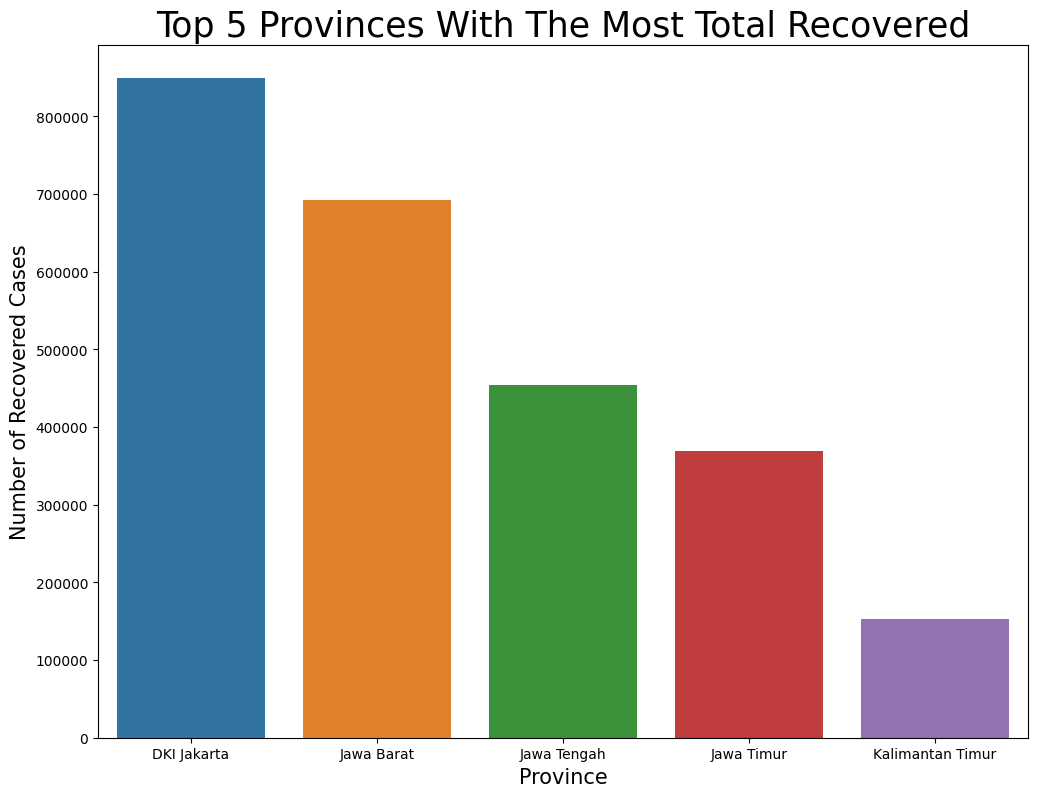

In [144]:
# plotting a bar plot of provinces with the most total recovered using seaborn

plt.figure(figsize=(12,9))
sns.barplot(x=new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False)['Location'].values[:5], y=new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False)['Total Recovered'].values[:5])
plt.title('Top 5 Provinces With The Most Total Recovered', fontsize=25)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Number of Recovered Cases', fontsize=15)
plt.show()

In [145]:
#sorting the data from descending order of total active cases
new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Active Cases'], ascending=False)

Date                    Location  New Cases  New Deaths  \
21748 2021-12-02                       Papua          2           0   
21738 2021-12-02                 Jawa Tengah         30           1   
21737 2021-12-02                  Jawa Barat         83           0   
21750 2021-12-02                        Riau          4           0   
21733 2021-12-02                 DKI Jakarta         28           0   
21745 2021-12-02                     Lampung          2           0   
21734 2021-12-02  Daerah Istimewa Yogyakarta          7           0   
21749 2021-12-02                 Papua Barat          9           0   
21739 2021-12-02                  Jawa Timur         35           0   
21731 2021-12-02                        Bali         15           1   
21747 2021-12-02         Nusa Tenggara Timur          9           0   
21732 2021-12-02                      Banten         16           0   
21744 2021-12-02   Kepulauan Bangka Belitung          8           0   
21757 2021-12-02              Sumatera Utara          4           0   
21754 2021-12-02              Sulawesi Utara          2           0   
21755 2021-12-02              Sumatera Barat          4           0   
21746 2021-12-02         Nusa Tenggara Barat          1           0   
21743 2021-12-02            Kalimantan Timur          7           0   
21742 2021-12-02           Kalimantan Tengah          4           0   
21751 2021-12-02            Sulawesi Selatan          1           1   
21753 2021-12-02           Sulawesi Tenggara          3           0   
21752 2021-12-02             Sulawesi Tengah         11           0   
21740 2021-12-02            Kalimantan Barat          5           0   
21617 2021-11-28                Maluku Utara          2           0   
21741 2021-12-02          Kalimantan Selatan          2           0   
21756 2021-12-02            Sumatera Selatan          4           0   
21712 2021-12-01            Kalimantan Utara          1           0   
21700 2021-12-01                    Bengkulu          1           0   
21730 2021-12-02                        Aceh          2           0   
21716 2021-12-01                      Maluku          1           0   
21714 2021-12-01              Kepulauan Riau          2           0   
21736 2021-12-02                       Jambi          1           0   
21722 2021-12-01              Sulawesi Barat          1           0   
21364 2021-11-21                   Gorontalo          1           0   

       New Recovered  New Active Cases  Total Cases  Total Deaths  \
21748              0                 2        34341           559   
21738              6                23       486435         30225   
21737              6                77       707934         14737   
21750              0                 4       128825          4109   
21733              0                28       864045         13596   
21745              0                 2        49691          3866   
21734              0                 7       156769          5263   
21749              0                 9        23378           357   
21739             11                24       399478         29697   
21731              1                13       114233          4046   
21747              0                 9        64035          1340   
21732              1                15       132693          2688   
21744              0                 8        52290          1455   
21757              1                 3       106045          2889   
21754              0                 2        34715          1056   
21755              0                 4        89849          2152   
21746              0                 1        27777           815   
21743              2                 5       158245          5449   
21742              1                 3        45622          1430   
21751              1                -1       109919          2238   
21753              0                 3        20160           527   
21752   

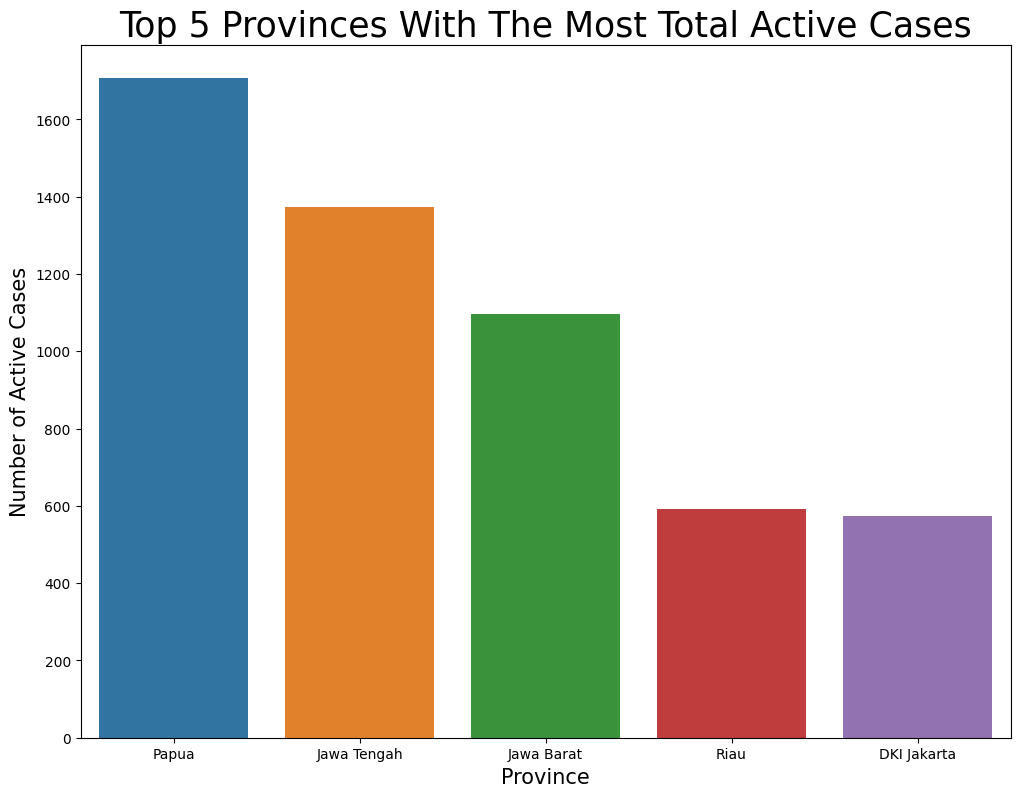

In [146]:
# plotting a bar plot of provinces with the most total active case using seaborn

plt.figure(figsize=(12,9))
sns.barplot(x=new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Active Cases'], ascending=False)['Location'].values[:5], y=new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Active Cases'], ascending=False)['Total Active Cases'].values[:5])
plt.title('Top 5 Provinces With The Most Total Active Cases', fontsize=25)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Number of Active Cases', fontsize=15)
plt.show()


In [147]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data1['Date'],
                         y=data1['Total Cases'],
                         mode='lines',
                         name= 'Total Cases'
                        ))

fig.update_layout(title='Number of Cases up to December 2021',
                 template='plotly_white',
                 xaxis_title='Date',
                 yaxis_title='Total Cases'
                 )
fig.show()

In [148]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data1['Date'],
                         y=data1['New Cases'],
                         mode='lines',
                         name= 'Total Cases'
                        ))

fig.update_layout(title='Number of New Cases until December 2021',
                 template='plotly_white',
                 xaxis_title='Date',
                 yaxis_title='Total Cases'
                 )
fig.show()

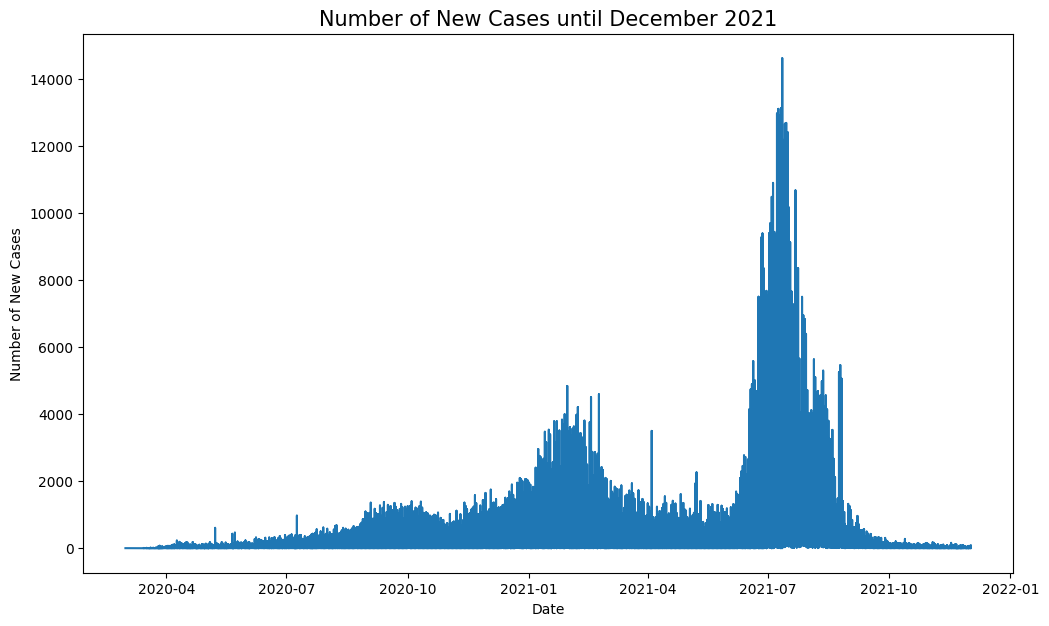

In [149]:
#trend of Covid death cases in DKI Jakarta in the last 7 days (until 9 July 2021
plt.figure(figsize=(12,7))
plt.plot(data1['Date'].values ,data1['New Cases'].values)
plt.title('Number of New Cases until December 2021', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.show()

In [153]:
#highlighting the covid 19 cases in jakarta
#getting the location of jakarta
dki = new_data[new_data.Location == 'DKI Jakarta']
dki

Date     Location  New Cases  New Deaths  New Recovered  \
0     2020-03-01  DKI Jakarta          2           0              0   
1     2020-03-02  DKI Jakarta          2           0              0   
4     2020-03-03  DKI Jakarta          2           0              0   
8     2020-03-04  DKI Jakarta          2           0              0   
12    2020-03-05  DKI Jakarta          0           1              0   
...          ...          ...        ...         ...            ...   
21601 2021-11-28  DKI Jakarta         51           0             52   
21635 2021-11-29  DKI Jakarta         41           0             71   
21668 2021-11-30  DKI Jakarta         44           0              0   
21701 2021-12-01  DKI Jakarta         70           0              1   
21733 2021-12-02  DKI Jakarta         28           0              0   

       New Active Cases  Total Cases  Total Deaths  Total Recovered  \
0                     2           39            20               41   
1                     2           41            20               41   
4                     2           43            20               41   
8                     2           45            20               41   
12                   -1           45            21               41   
...                 ...          ...           ...              ...   
21601                -1       863862         13596           849803   
21635               -30       863903         13596           849874   
21668                44       863947         13596           849874   
21701                69       864017         13596           849875   
21733                28       864045         13596           849875   

       Total Active Cases Location Level  Area (km2)  Population  \
0                     -22       Province         664    10846145   
1                     -20       Province         664    10846145   
4                     -18       Province         664    10846145   
8                     -16       Province         664    10846145   
12                    -17       Province         664    10846145   
...                   ...            ...         ...         ...   
21601                 463       Province         664    10846145   
21635                 433       Province         664    10846145   
21668                 477       Province         664    10846145   
21701                 546       Province         664    10846145   
21733                 574       Province         664    10846145   

       Population Density   Longitude  Latitude  Total Deaths per 100rb  
0                16334.31  106.836118 -6.204699                    0.18  
1                16334.31  106.836118 -6.204699                    0.18  
4                16334.31  106.836118 -6.204699                    0.18  
8                16334.31  106.836118 -6.204699                    0.18  
12               16334.31  106.836118 -6.204699                    0.19  
...                   ...         ...       ...                     ...  
21601            16334.31  106.836118 -6.204699                  125.35  
21635            16334.31  106.836118 -6.204699                  125.35  
21668            16334.31  106.836118 -6.204699                  125.35  
21701            16334.31  106.836118 -6.204699                  125.35  
21733            16334.31  106.836118 -6.204699                  125.35  

[642 rows x 17 columns]

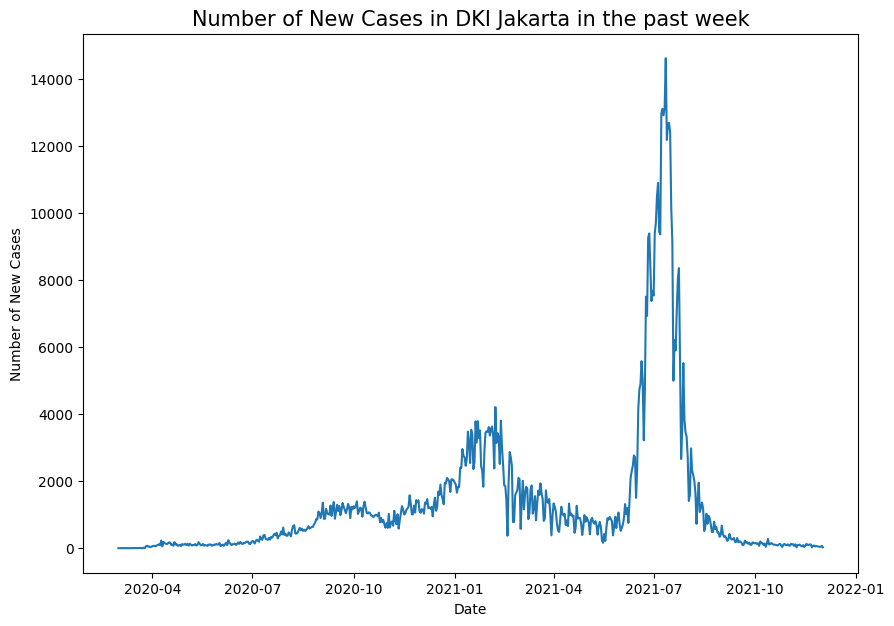

In [154]:
#trend of Covid new cases in DKI Jakarta until dec 2021
plt.figure(figsize=(10,7))
plt.plot(dki['Date'].values ,dki['New Cases'].values)
plt.title('Number of New Cases in DKI Jakarta in the past week', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.show()

In [155]:
#Comparison of Increase in New Cases, Deaths and recoveries
plt.figure(figsize=(10,9))
plt.plot(dki['Date'].values ,dki['New Cases'].values, label='Cases')
plt.plot(dki['Date'].values, dki['New Recovered'].values, label = 'Recover')
plt.plot(dki['Date'].values, dki['New Deaths'].values, label = 'Death')
plt.title('Comparison of Increase in New Cases, Deaths and recoveries ')
plt.xlabel('Date')
plt.ylabel('number of cases')
plt.legend()
plt.show()

In [156]:
#Jakarta Covid 19 Death Rate until Dec 2021
plt.figure(figsize=(10,9))
plt.plot(dki['Date'].values, dki['New Deaths'].values, label = 'Death')
plt.title('DKI Jakarta Covid 19 Death Rate 3 July - 9 July 2021')
plt.xlabel('Time')
plt.ylabel('Number of Death Cases')
plt.legend()
plt.show()

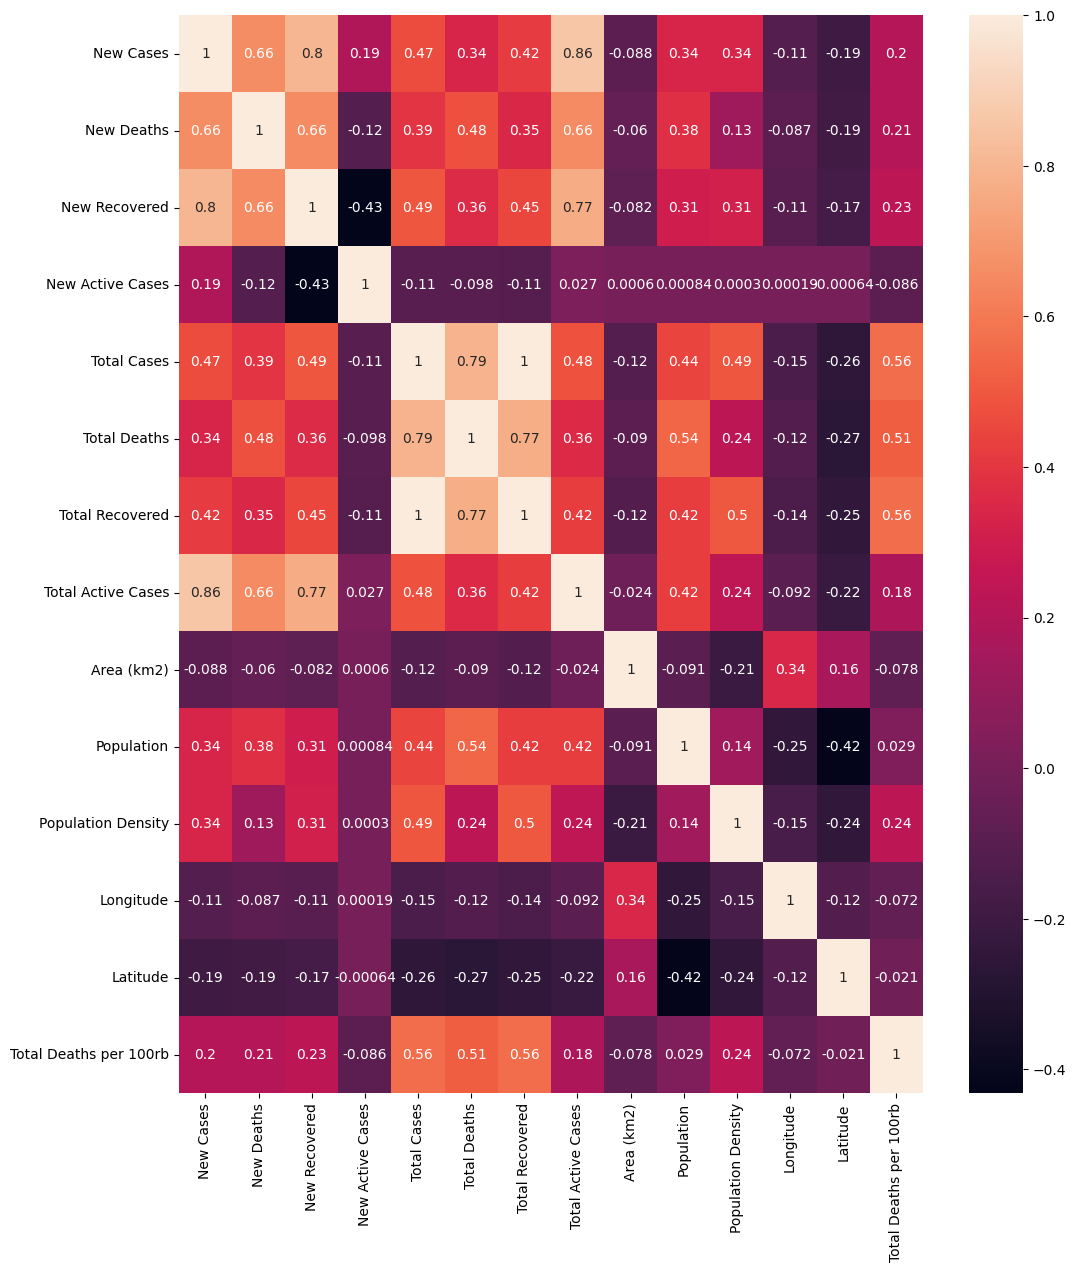

In [161]:
#Seeing the correlation between variables in a heatmap
#The heatmap shows the correlations between the different columns in the data1 dataframe
plt.figure(figsize=(12,14))
sns.heatmap(data1.corr(numeric_only=True), annot=True)
plt.show()